## 3 Layer Neural Network

In [83]:
# Generation of Data samples required
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# creating 25 samples between [-10, 10]
x = np.array(np.linspace(-10, 10, 25))
y = np.array([np.exp(-np.sin(x[i]**2)/2) + x[i] for i in range(len(x))])

# splitting data with 80% : 20% ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# forward propagation
def fpp(x, w1,b1, w2,b2, w3,b3, activation):
    # layer 1
    z1 = x * w1 + b1
    a1 = activation(z1)
    # layer 2
    z2 = a1 * w2 + b2
    a2 = activation(z2)
    # layer 3
    z3 = a2 * w3 + b3
    a3 = activation(z3)

    return z1,a1,z2,a2,z3,a3

# calculating loss
def calculateLoss(y,y_pred,loss_fn):
    loss = loss_fn(y,y_pred)
    return loss

def bpp(x,y,y_pred, a3,z3,w3,b3, a2,z2,w2,b2, a1,z1,w1,b1, learning_rate, derivative):
    # layer 3
    dL_dy_pred = (y_pred - y)
    dy_pred_dz3 = derivative(z3)
    dL_dz3 = dL_dy_pred * dy_pred_dz3

    dz3_dw3 = a2
    dz3_db3 = 1

    dL_dw3 = dL_dz3 * dz3_dw3
    dL_db3 = dL_dz3 * dz3_db3
# ------------------------------------------------------------------------------
    # layer 2
    dz3_da2 = w3
    da2_dz2 = derivative(z2)
    dL_dz2 = (dz3_da2 * dL_dz3) * da2_dz2

    dz2_dw2 = a1
    dz2_db2 = 1

    dL_dw2 = dL_dz2 * dz2_dw2
    dL_db2 = dL_dz2 * dz2_db2
# ------------------------------------------------------------------------------
    # layer 1
    dz2_da1 = w2
    da1_dz1 = derivative(z1)
    dL_dz1 = (dz2_da1 * dL_dz2) * da1_dz1

    dz1_dw1 = x
    dz1_db1 = 1

    dL_dw1 = dL_dz1 * dz1_dw1
    dL_db1 = dL_dz1 * dz1_db1
# ------------------------------------------------------------------------------
    # updating parameters
    w3 = w3 - (learning_rate * dL_dw3)
    b3 = b3 - (learning_rate * dL_db3)

    w2 = w2 - (learning_rate * dL_dw2)
    b2 = b2 - (learning_rate * dL_db2)

    w1 = w1 - (learning_rate * dL_dw1)
    b1 = b1 - (learning_rate * dL_db1)

    return w1,b1,w2,b2,w3,b3


# driver code
def train(x_train, y_train, activation, derivative, loss_fn, epochs = 10000, learning_rate = 0.01):
    # initial parameters are taken randomly
    w1 = np.random.randn()
    b1 = np.random.randn()

    w2 = np.random.randn()
    b2 = np.random.randn()

    w3 = np.random.randn()
    b3 = np.random.randn()

    m = len(x_train)
    for i in range(epochs):
        loss = 0
        for j in range(m):
            x = x_train[j]
            y = y_train[j]
            z1,a1,z2,a2,z3,a3 = fpp(x,w1,b1,w2,b2,w3,b3,activation)
            w1,b1,w2,b2,w3,b3 = bpp(x,y,a3, a3,z3,w3,b3, a2,z2,w2,b2, a1,z1,w1,b1, learning_rate,derivative)
            loss += calculateLoss(y,a3,loss_fn)
        loss = loss/m
        # print(f"Epoch: {i+1}, Loss: {loss}")

    return w1,b1,w2,b2,w3,b3

In [84]:
# derivative
def d_relu(x):
    return 1 if x > 0 else 0
def d_tanh(x):
    return 1 - np.tanh(x)**2

# activation function
def relu(x):
  return max(0,x)
def tanh(x):
  return np.tanh(x)

# mean squared error
def mse(y,y_pred):
    return (y-y_pred)**2

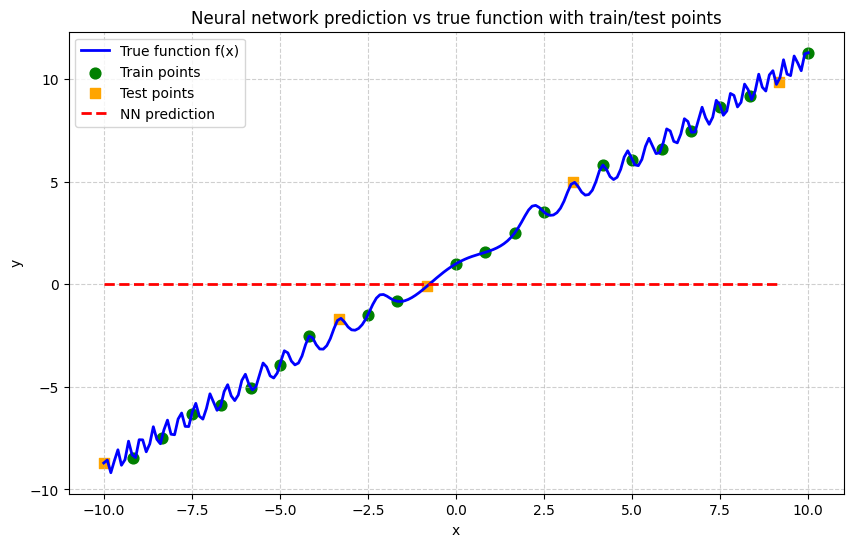

In [85]:
# training
w1,b1,w2,b2,w3,b3 = train(x_train,y_train,relu,d_relu,mse) # change activation and differentiation of activation function here

# testing
y_pred = []
for i in range(len(x_test)):
    x = x_test[i]
    z1,a1,z2,a2,z3,a3 = fpp(x,w1,b1,w2,b2,w3,b3,relu)
    y_pred.append(a3)

# plotting in graph
y_pred = np.array(y_pred)
sort_idx = np.argsort(x_test)
x_sorted = x_test[sort_idx]
y_test_sorted = y_test[sort_idx]
y_pred_sorted = y_pred[sort_idx]

# true function (dense for smooth curve)
x_dense = np.linspace(-10, 10, 200)
y_dense = np.exp(-np.sin(x_dense**2)/2) + x_dense

plt.figure(figsize=(10,6))
plt.plot(x_dense, y_dense, label="True function f(x)", color="blue", linewidth=2)
plt.scatter(x_train, y_train, color="green", marker="o", s=60, label="Train points")
plt.scatter(x_test, y_test, color="orange", marker="s", s=60, label="Test points")
plt.plot(x_sorted, y_pred_sorted, label="NN prediction", color="red", linestyle="--", linewidth=2)

plt.legend()
plt.title("Neural network prediction vs true function with train/test points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
